In [26]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

# token = "91e924ed1b80bc0b25d7e50ea6546744750ba9665f81d70b5b0cdf76"
# pro = ts.pro_api(token)

# 宏观经济指标
## GDP

In [21]:
import qstock as qs
gdp = qs.macro_data('gdp')
gdp.head(3)

,季度,国内生产总值,第一产业,第二产业,第三产业,国内生产总值同比,第一产业同比,第二产业同比,第三产业同比
0,2024年第1-3季度,949745.7,57733.1,361361.6,530651.1,4.8,3.4,5.4,4.7
1,2024年第1-2季度,616836.0,30660.0,236529.9,349646.1,5.0,3.5,5.8,4.6
2,2024年第1季度,296299.5,11538.4,109846.3,174914.7,5.3,3.3,6.0,5.0


In [23]:
cpi = qs.macro_data('cpi')
cpi.tail(3)

,月份,全国同比,全国当月,全国环比,全国累计,城市同比,城市当月,城市环比,城市累计,农村同比,农村当月,农村环比,农村累计
200,2024年09月份,0.4,100.4,0.0,100.3,0.4,100.4,-0.1,100.2,0.6,100.6,0.1,100.3
201,2024年10月份,0.3,100.3,-0.3,100.3,0.2,100.2,-0.3,100.2,0.3,100.3,-0.3,100.3
202,2024年11月份,0.2,100.2,-0.6,100.3,0.1,100.1,-0.6,100.2,0.2,100.2,-0.6,100.3


## 新闻数据分析

In [28]:
news = qs.news_data()
news.tail()

,标题,内容,发布时间,发布日期
45,俄罗斯将成立政府工作组 负责油轮失事事件救援及后续工作,【俄罗斯将成立政府工作组 负责油轮失事事件救援及后续工作】财联社12月15日电，俄罗斯总统新...,22:39:54,2024-12-15
46,【公告全知道】华为海思+机器人+人工智能+无人机+算力+卫星互联网！公司向华为提供以海思芯片...,①华为海思+机器人+人工智能+无人机+算力+卫星互联网！这家公司向华为终端和华为技术两家公司...,22:45:45,2024-12-15
47,以太坊站上3900美元,【以太坊站上3900美元】财联社12月15日电，以太坊站上3900美元，24小时内涨约1%。,23:00:22,2024-12-15
48,秘鲁南部地区发生4.4级地震,【秘鲁南部地区发生4.4级地震】财联社12月15日电，根据秘鲁地球物理研究所国家地震中心报告...,23:05:07,2024-12-15
49,战火重创经济 苏丹今年11月通货膨胀率近200%,【战火重创经济 苏丹今年11月通货膨胀率近200%】财联社12月15日电，苏丹中央统计局当地...,23:09:30,2024-12-15


In [29]:
type(news)

pandas.core.frame.DataFrame

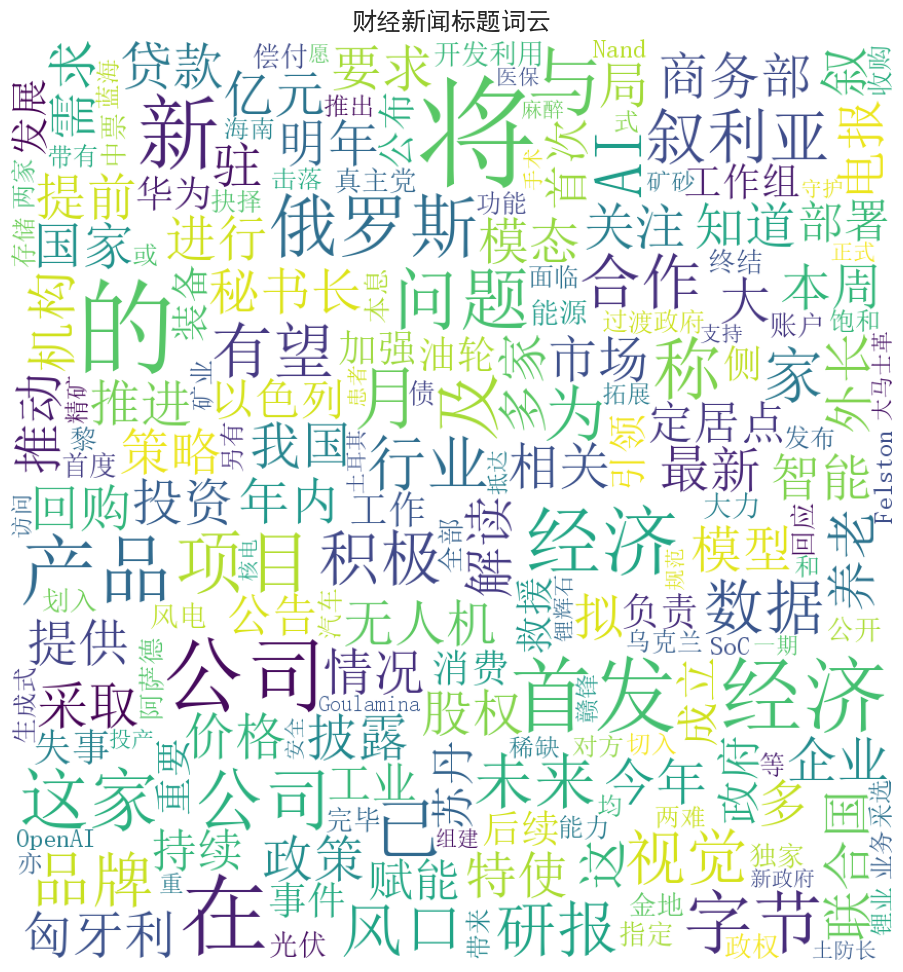

In [33]:
mylist = news["标题"].tolist()
#对标题内容进行分词（即切割为一个个关键词）
word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist]
new_text = ' '.join(word_list)
#图片可以根据需要更改，这里使用了中国地图.jpg
#读取图片

img = plt.imread("china.png")
#设置词云格式
wc = WordCloud(background_color="white", 
     mask=img,#设置背景图片
     max_font_size=120, #字体最大值
     random_state=42,  #颜色随机性
     font_path="c:\windows\fonts\simsun.ttc")
#font_path显示中文字体，这里使用黑体

#生成词云
wc.generate(new_text)
image_colors = ImageColorGenerator(img)
#设置图片大小

plt.figure(figsize=(14,12))
plt.imshow(wc)
plt.title('财经新闻标题词云',fontsize=18)
plt.axis("off")
plt.show()